In [54]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_excel('stockx_data.xlsx')

y = data["Price_Percentage_change"]
X = sm.add_constant(data.drop(["Sale Price",'Price_Percentage_change', "Other States", "New York", "Texas"], axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=808)

# Finding the best ccp_alpha value
ccp_alphas = np.linspace(0, 0.01, 20) 
mse_scores = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    mse_scores.append(np.mean((model.predict(X_test) - y_test)**2))

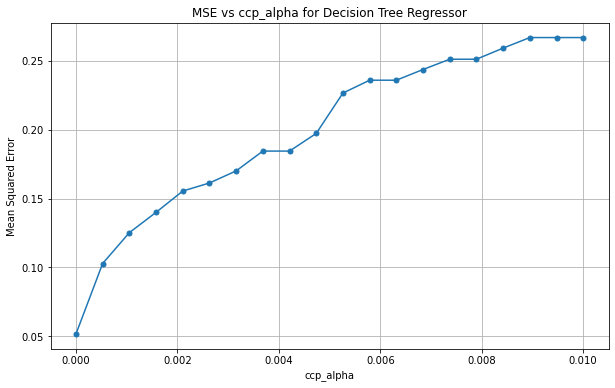

The best ccp_alpha value is: 0.0


In [55]:
# Plotting the MSE scores against ccp_alpha values
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, mse_scores, marker='o', linestyle='-', markersize=5)
plt.title('MSE vs ccp_alpha for Decision Tree Regressor')
plt.xlabel('ccp_alpha')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Find the ccp_alpha value with the lowest MSE
best_ccp_alpha = ccp_alphas[np.argmin(mse_scores)]
print(f"The best ccp_alpha value is: {best_ccp_alpha}")


In [56]:
# Train a CART model with the best ccp_alpha value
cart_model = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(cart_model, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = cart_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"OSR² score: {r2}")

Mean Absolute Error (MAE): 0.08820502331945353
Mean Squared Error (MSE): 0.050627246460299
Root Mean Squared Error (RMSE): 0.22500499207861813
OSR² score: 0.9776770819917511


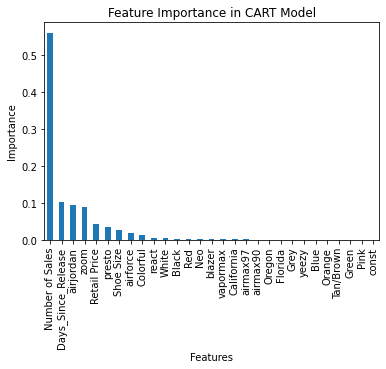

In [58]:
# Feature importance
import pandas as pd

feature_importances = pd.Series(cart_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

# Plotting the feature importances
feature_importances.plot(kind='bar')
plt.title('Feature Importance in CART Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)

X_pca_df = pd.DataFrame(data=X_pca)

In [60]:
#CART model with PCA 

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.33, random_state=808)

cart_model = DecisionTreeRegressor(random_state=808)
cart_model.fit(X_train_pca, y_train)

cart_predictions_pca = cart_model.predict(X_test_pca)
cart_mse_pca = mean_squared_error(y_test, cart_predictions_pca)
rmse_pca = np.sqrt(mse)
r_squared_pca = r2_score(y_test, cart_predictions_pca)

print(f"CART Model MSE with PCA: {cart_mse_pca}")
print(f"Root Mean Squared Error (RMSE): {rmse_pca}")
print(f"R-squared: {r_squared_pca}")

CART Model MSE with PCA: 0.07497891672997879
Root Mean Squared Error (RMSE): 0.22500499207861813
R-squared: 0.966939773984683
